**Business Understanding:**

*Predicting traffic situations to enhance traffic management and resource allocation.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading the Dataset

df = pd.read_csv('/content/Traffic_1.csv')

Traffic Intensity Prediction

Target Variable: Traffic Situation

Objective: Predict the level of traffic intensity (low, normal, etc.) based on:

->Time of the day (Time)

->Day of the week (Day of the week)

->Counts of different types of vehicles (CarCount, BikeCount, BusCount, TruckCount)

**Use Case:** Help in traffic management systems to plan resources like traffic signals, public transportation, and emergency services.

In [ ]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10.0,Tuesday,31.0,0.0,4.0,4.0,39.0,low
1,12:15:00 AM,10.0,Tuesday,49.0,0.0,3.0,3.0,55.0,low
2,12:30:00 AM,10.0,Tuesday,46.0,0.0,3.0,6.0,55.0,low
3,12:45:00 AM,10.0,Tuesday,NaN,0.0,2.0,5.0,58.0,low
4,1:00:00 AM,10.0,Tuesday,57.0,6.0,15.0,16.0,94.0,normal


Content Columns:

Time: Indicates time intervals.

Date: Dates associated with the traffic data.

Day of the week: Names of days.

CarCount, BikeCount, BusCount, TruckCount: Count of respective vehicle types.

Total: Total vehicle count.

Traffic Situation: Categorical variable indicating traffic intensity (low, normal, high, etc).

In [ ]:
df.isnull().sum()

,0
Time,0
Date,62
Day of the week,56
CarCount,72
BikeCount,43
BusCount,54
TruckCount,26
Total,33
Traffic Situation,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               2976 non-null   object 
 1   Date               2914 non-null   float64
 2   Day of the week    2920 non-null   object 
 3   CarCount           2904 non-null   float64
 4   BikeCount          2933 non-null   float64
 5   BusCount           2922 non-null   float64
 6   TruckCount         2950 non-null   float64
 7   Total              2943 non-null   float64
 8   Traffic Situation  2976 non-null   object 
dtypes: float64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
display(df.columns)

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [ ]:
def lowercase(df):
    for col in df.select_dtypes("O"):
        df[col] = df[col].str.lower()

# Calling function on dataframes
lowercase(df)

Checking Duplicated Columns

In [ ]:
display(df[df.duplicated()])
print(f"Number of Rows Duplicated: {len(df[df.duplicated()])}")

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation


Number of Rows Duplicated: 0


In [ ]:
display(df.shape)

(2976, 9)

Converting the Time Column into Morning, Afternoon, Evening, and Night according to the time

In [ ]:
# Function to categorize time into morning, afternoon, evening, and night
def categorize_time(time_str):
    # Convert time to datetime format
    time = pd.to_datetime(time_str, format='%I:%M:%S %p')
    hour = time.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the Time column
df['Time Category'] = df['Time'].apply(categorize_time)

# Display the updated dataset
df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Time Category
0,12:00:00 am,10.0,tuesday,31.0,0.0,4.0,4.0,39.0,low,Night
1,12:15:00 am,10.0,tuesday,49.0,0.0,3.0,3.0,55.0,low,Night
2,12:30:00 am,10.0,tuesday,46.0,0.0,3.0,6.0,55.0,low,Night
3,12:45:00 am,10.0,tuesday,NaN,0.0,2.0,5.0,58.0,low,Night
4,1:00:00 am,10.0,tuesday,57.0,6.0,15.0,16.0,94.0,normal,Night


In [ ]:
df['Time Category'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

In [ ]:
# Dropping the Time Column

df = df.drop('Time',axis=1)

In [ ]:
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Time Category
0,10.0,tuesday,31.0,0.0,4.0,4.0,39.0,low,Night
1,10.0,tuesday,49.0,0.0,3.0,3.0,55.0,low,Night
2,10.0,tuesday,46.0,0.0,3.0,6.0,55.0,low,Night
3,10.0,tuesday,NaN,0.0,2.0,5.0,58.0,low,Night
4,10.0,tuesday,57.0,6.0,15.0,16.0,94.0,normal,Night


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2914 non-null   float64
 1   Day of the week    2920 non-null   object 
 2   CarCount           2904 non-null   float64
 3   BikeCount          2933 non-null   float64
 4   BusCount           2922 non-null   float64
 5   TruckCount         2950 non-null   float64
 6   Total              2943 non-null   float64
 7   Traffic Situation  2976 non-null   object 
 8   Time Category      2976 non-null   object 
dtypes: float64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
# checking the duplictae rows after validation

df[df.duplicated()]

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Time Category
186,11.0,wednesday,18.0,2.0,1.0,25.0,46.0,normal,Night
2302,2.0,thursday,16.0,2.0,0.0,35.0,53.0,normal,Night


In [ ]:
import sys
sys.path.append('/path/to/your/library')


**EDA(Exploratory Data Analysis)**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Select numeric columns (both int and float types)
numeric_columns = df.select_dtypes(include=['number']).columns

# Show the selected numerical columns
print(numeric_columns)


Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total'], dtype='object')


Discriptive Stats

In [ ]:
import pandas as pd

# Function to perform statistical summary and calculate skewness and kurtosis
def statistical_eda(df):
    # Filter only numeric columns (int, float)
    numeric_columns = df.select_dtypes(include=['number']).columns

    print("Descriptive Statistics:")
    # Get basic statistics (mean, std, min, 25th percentile, median, 75th percentile, max)
    print(df[numeric_columns].describe())

    print("\nSkewness and Kurtosis:")
    # Skewness and Kurtosis for numeric columns
    print(df[numeric_columns].skew())  # Skewness
    print(df[numeric_columns].kurt())  # Kurtosis

    print("\nCorrelation Matrix:")
    # Correlation matrix for numeric columns
    print(df[numeric_columns].corr())

# Example: Apply statistical EDA to the dataset
statistical_eda(df)


Descriptive Statistics:
              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  2914.000000  2904.000000  2933.000000  2922.000000  2950.000000   
mean     15.958819    68.642906    14.905557    15.211157    15.317627   
std       8.935883    45.861489    12.856709    14.305642    10.608917   
min       1.000000     6.000000     0.000000     0.000000     0.000000   
25%       8.000000    19.000000     5.000000     1.000000     6.000000   
50%      16.000000    64.000000    12.000000    12.000000    14.000000   
75%      24.000000   107.000000    22.000000    25.000000    23.750000   
max      31.000000   180.000000    70.000000    50.000000    40.000000   

             Total  
count  2943.000000  
mean    114.243629  
std      60.140444  
min      21.000000  
25%      55.000000  
50%     109.000000  
75%     164.000000  
max     279.000000  

Skewness and Kurtosis:
Date          0.002055
CarCount      0.298932
BikeCount     1.325814
BusCount      0.722581
Truc

Univariate ( Numerical )

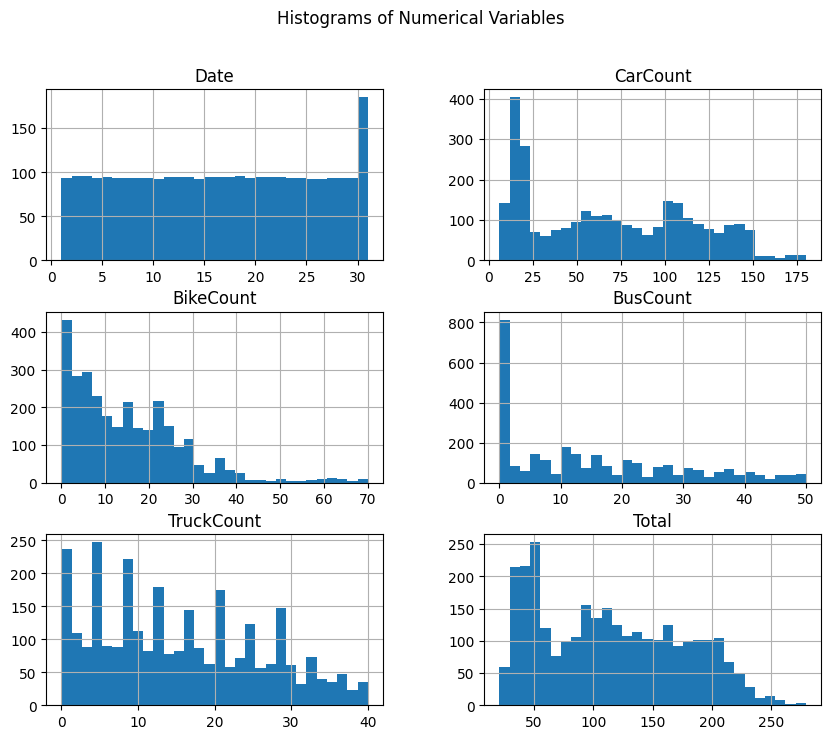

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis: Numerical Variables
def univariate_numerical(df):
    # print("Descriptive Statistics for Numerical Columns:")
    # print(df.describe())  # Basic descriptive statistics for numerical columns

    # Histograms for numerical columns
    df.hist(bins=30, figsize=(10, 8))
    plt.suptitle('Histograms of Numerical Variables')
    plt.show()
univariate_numerical(df)  # For numerical variables

Univariate ( Categorical )

Frequency Distribution for Categorical Columns:

Day of the week Frequency:
Day of the week
wednesday    472
tuesday      471
thursday     471
monday       378
sunday       377
saturday     376
friday       375
Name: count, dtype: int64


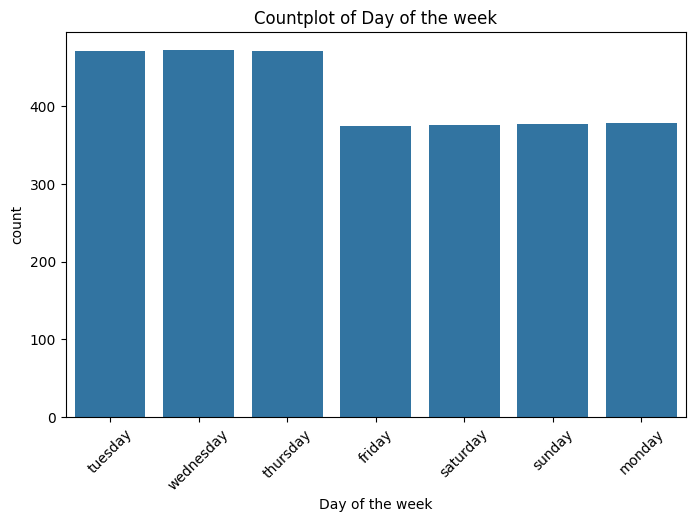


Traffic Situation Frequency:
Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64


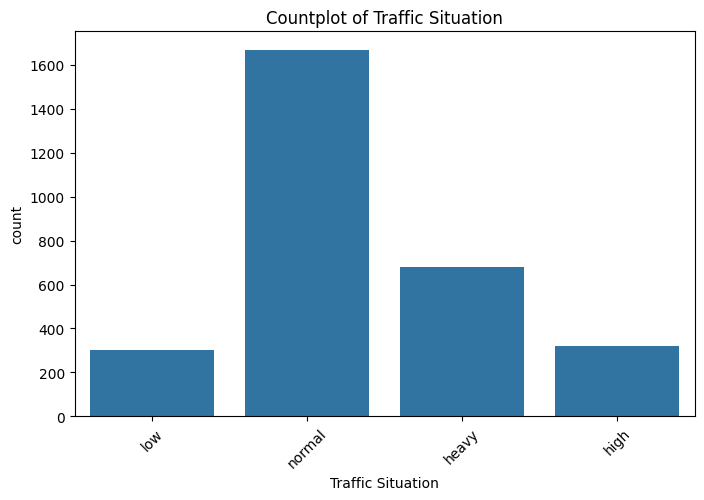


Time Category Frequency:
Time Category
Night        1116
Morning       744
Afternoon     744
Evening       372
Name: count, dtype: int64


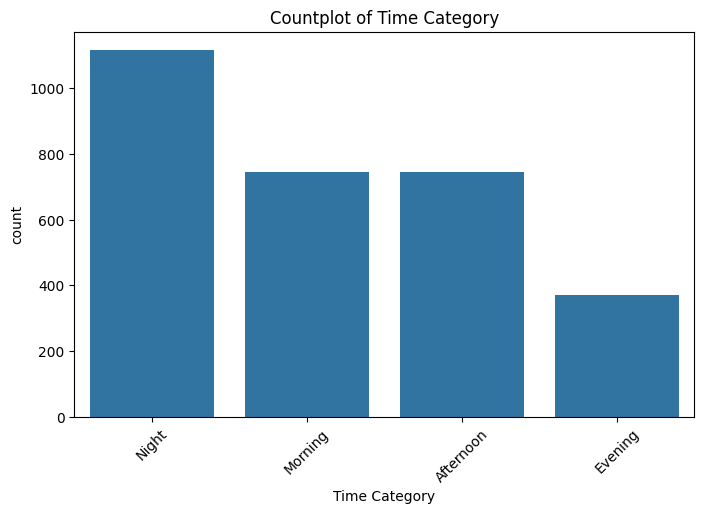

In [ ]:
# Univariate Analysis: Categorical Variables
def univariate_categorical(df):
    print("Frequency Distribution for Categorical Columns:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"\n{col} Frequency:")
        print(df[col].value_counts())

        # Bar plot for categorical columns
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.show()
univariate_categorical(df)  # For categorical variables


Bivariate(Numerical to Numerical)

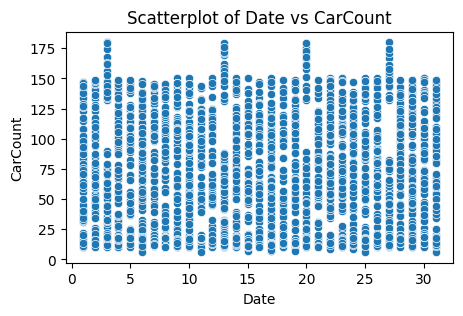

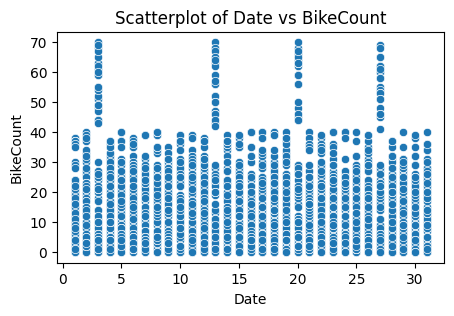

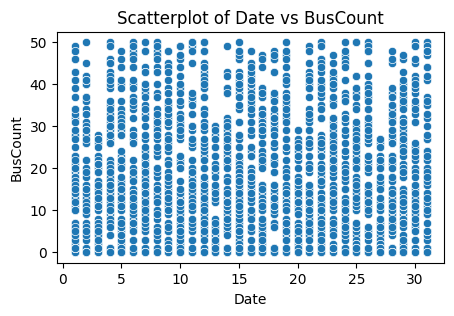

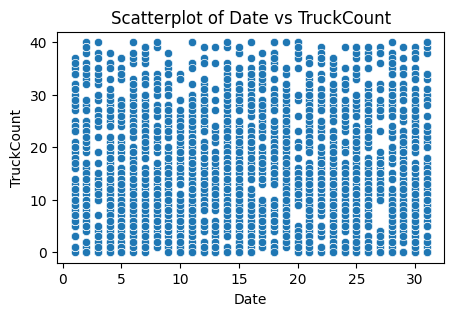

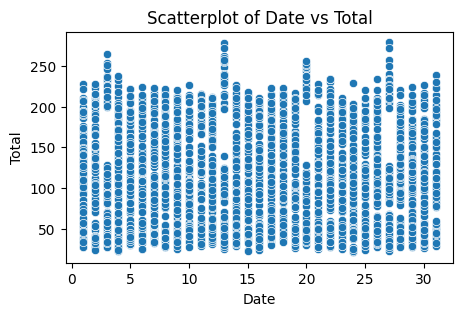

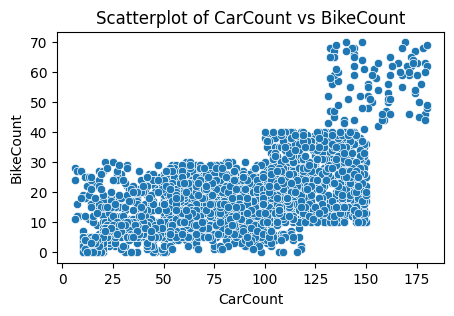

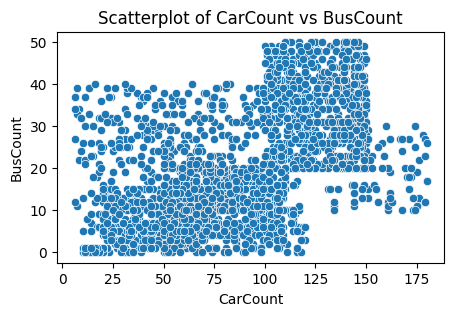

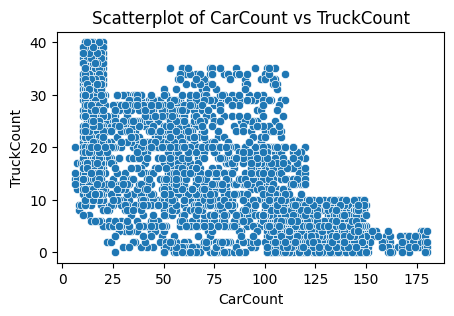

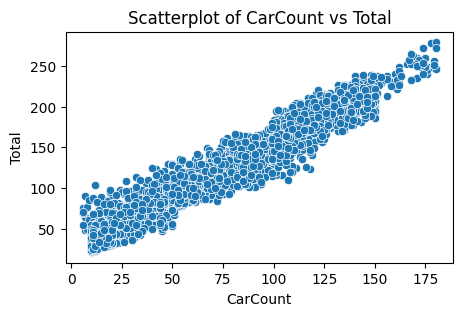

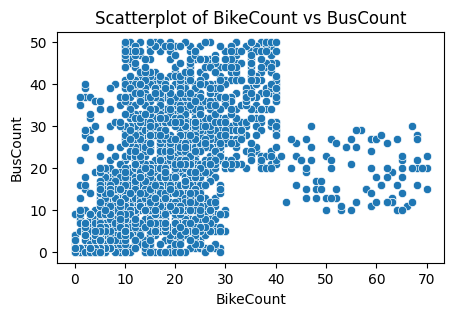

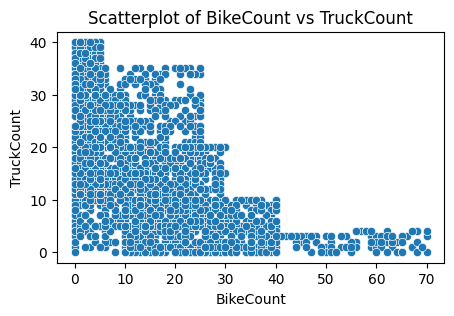

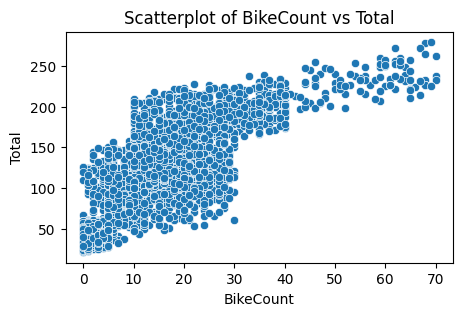

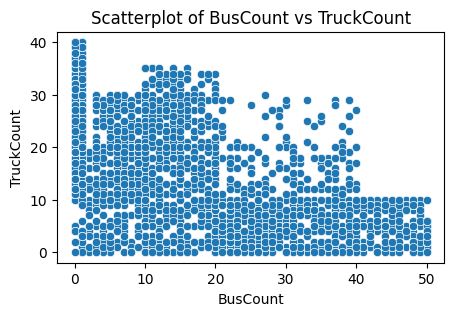

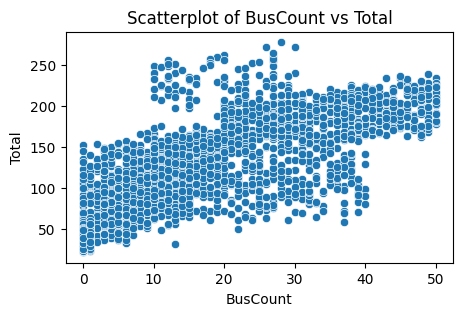

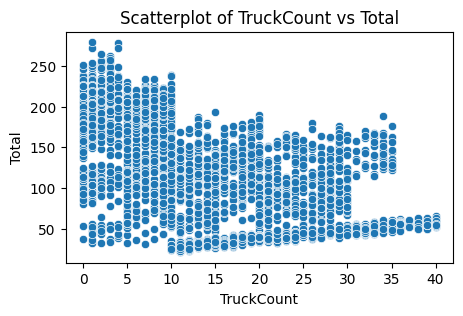

In [ ]:
# Bivariate Analysis: Numerical vs Numerical (num-num)
def bivariate_num_num(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    for i in range(len(numeric_columns)):
        for j in range(i+1, len(numeric_columns)):
            plt.figure(figsize=(5, 3))
            sns.scatterplot(data=df, x=numeric_columns[i], y=numeric_columns[j])
            plt.title(f'Scatterplot of {numeric_columns[i]} vs {numeric_columns[j]}')
            plt.show()
bivariate_num_num(df)  # For numerical vs numerical relationships

Bivariate ( Categorical vs Numerical )

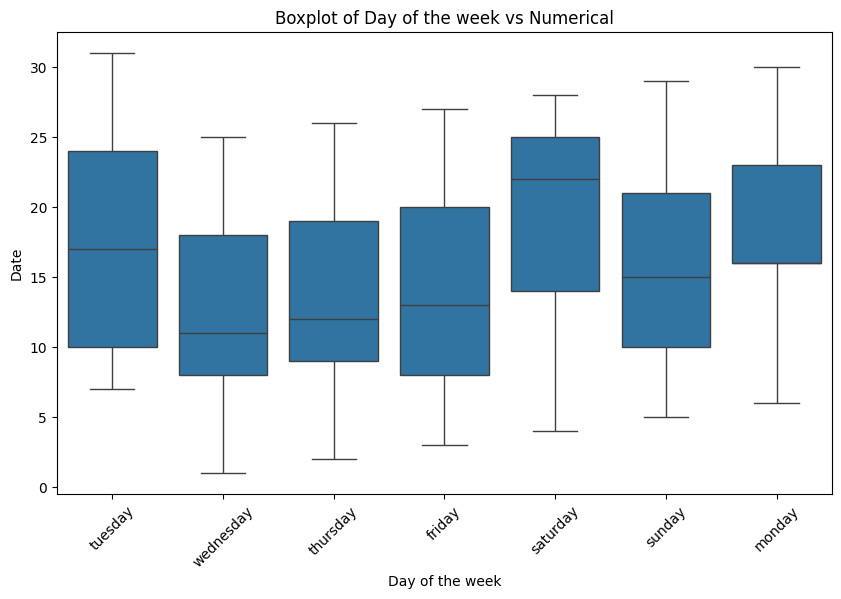

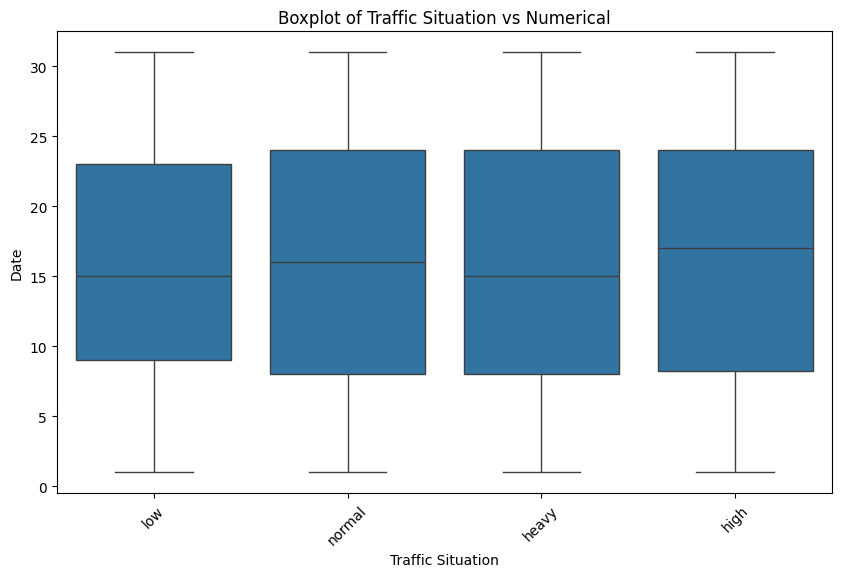

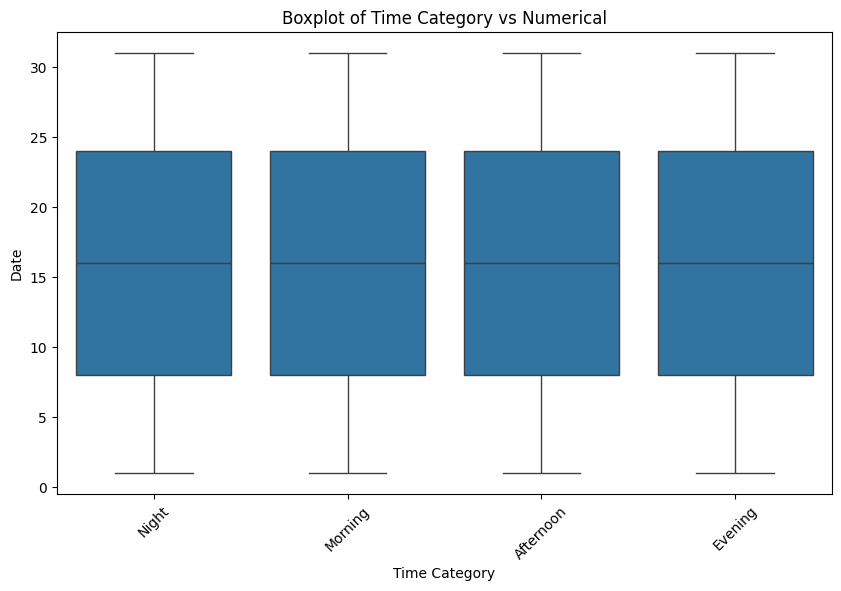

In [ ]:
# Bivariate Analysis: Categorical vs Numerical (cat-num)
def bivariate_cat_num(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=col, y=df.select_dtypes(include=['number']).columns[0])
        plt.title(f'Boxplot of {col} vs Numerical')
        plt.xticks(rotation=45)
        plt.show()
bivariate_cat_num(df)  # For categorical vs numerical relationships


Bivariate ( Categorical vs Categorical)

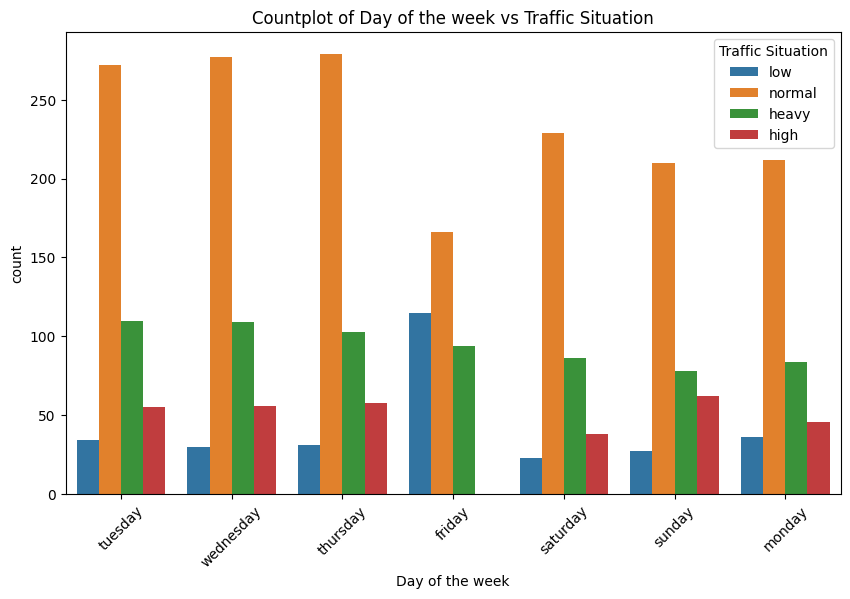

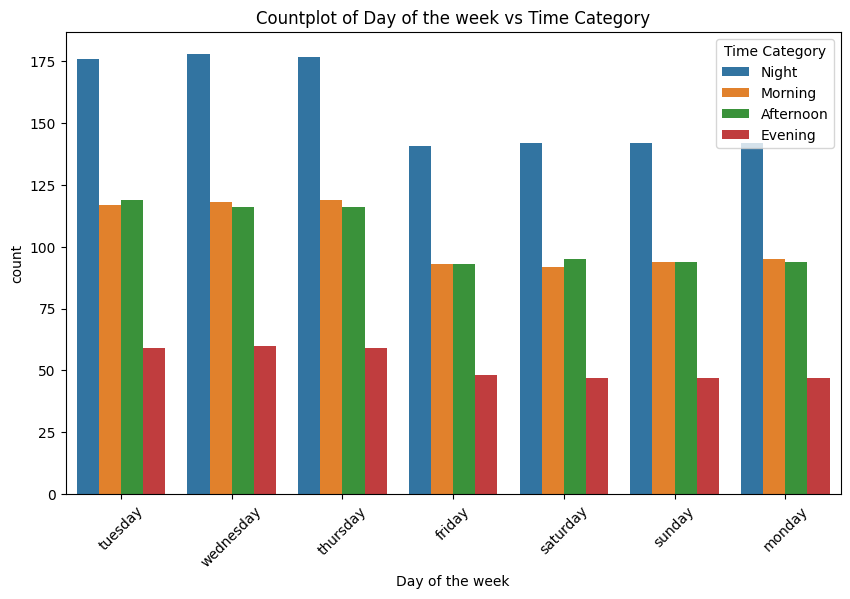

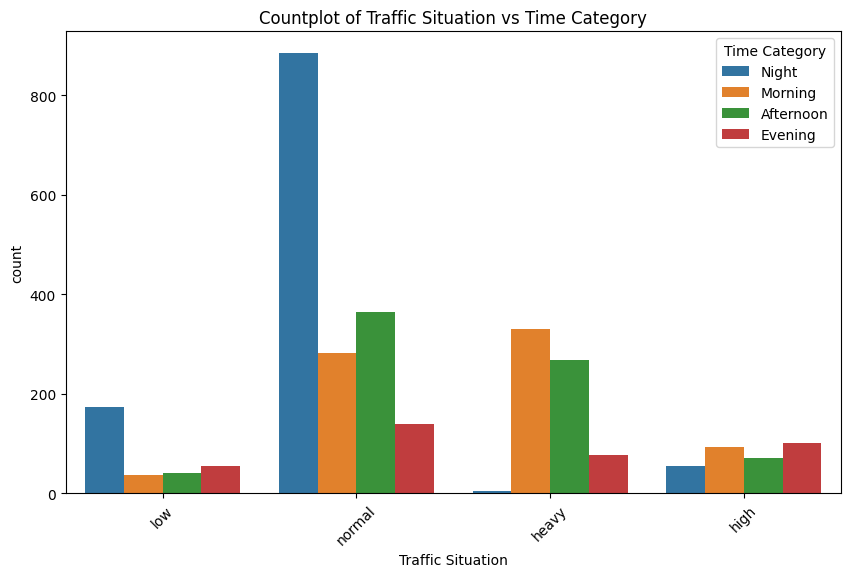

In [ ]:
# Bivariate Analysis: Categorical vs Categorical (cat-cat)
def bivariate_cat_cat(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for i in range(len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=categorical_columns[i], hue=categorical_columns[j])
            plt.title(f'Countplot of {categorical_columns[i]} vs {categorical_columns[j]}')
            plt.xticks(rotation=45)
            plt.show()
bivariate_cat_cat(df)  # For categorical vs categorical relationships


Most data points correspond to weekdays: Wednesday has the highest count, while Friday has the least weekday data.

Multivariate

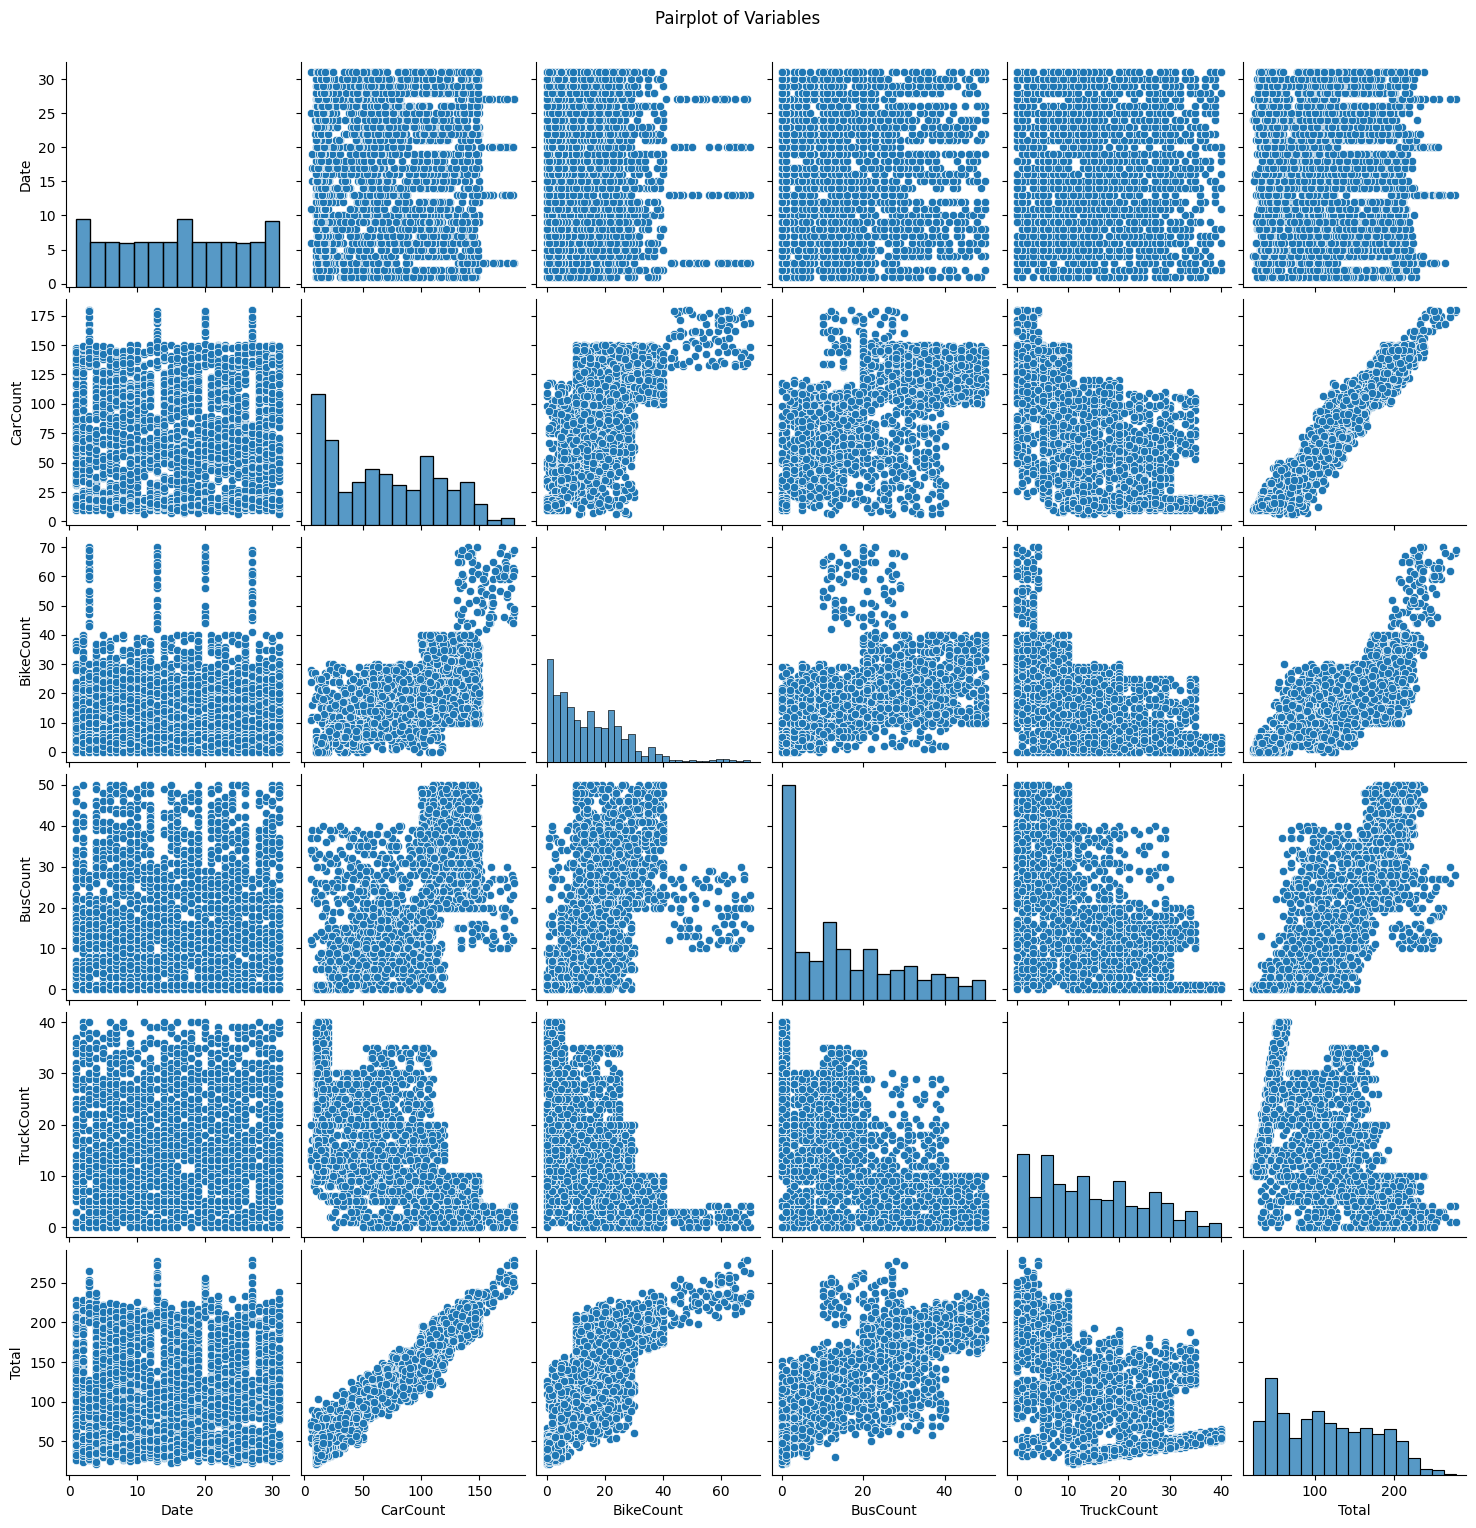

In [ ]:

# Multivariate Analysis
def multivariate_analysis(df):
    # Pairplot for multivariate analysis
    sns.pairplot(df)
    plt.suptitle('Pairplot of Variables', y=1.02)
    plt.show()

    # Heatmap for correlations in multivariate analysis
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    # plt.title('Correlation Heatmap for Multivariate Analysis')
    # plt.show()
multivariate_analysis(df)  # For multivariate analysis


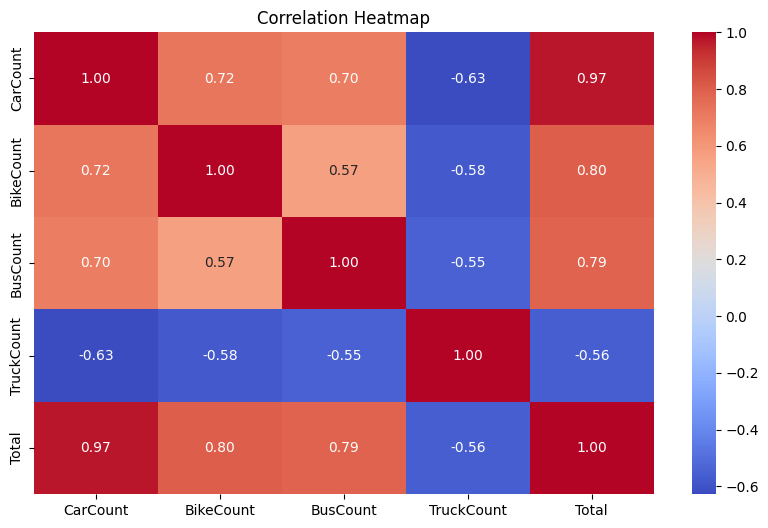

In [ ]:
# Heatmap of correlation between numerical variables
plt.figure(figsize=(10, 6))
correlation_matrix = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Handling Missing values and Outliers**

NaN(missing data in columns)

In [ ]:
df.isnull().sum()

,0
Date,62
Day of the week,56
CarCount,72
BikeCount,43
BusCount,54
TruckCount,26
Total,33
Traffic Situation,0
Time Category,0


**Handling Na**

Drop

**Column**

if we have more than 70-80% of the data missing

**rows**

if any row having half of the column data missing

In [ ]:
round((df.isnull().sum()/len(df))*100,2)

,0
Date,2.08
Day of the week,1.88
CarCount,2.42
BikeCount,1.44
BusCount,1.81
TruckCount,0.87
Total,1.11
Traffic Situation,0.00
Time Category,0.00


From the above, there are no columns that are more than 70-80% of the data missing

In [ ]:
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Time Category
0,10.0,tuesday,31.0,0.0,4.0,4.0,39.0,low,Night
1,10.0,tuesday,49.0,0.0,3.0,3.0,55.0,low,Night
2,10.0,tuesday,46.0,0.0,3.0,6.0,55.0,low,Night
3,10.0,tuesday,NaN,0.0,2.0,5.0,58.0,low,Night
4,10.0,tuesday,57.0,6.0,15.0,16.0,94.0,normal,Night


Checking Rows for missing values

In [ ]:
# Short code for checking row count of missing values in cols

display(df[df.isnull().sum(axis=1)>=6])

print(f"Number of Rows: {len(df[df.isnull().sum(axis=1)>=6])}")

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Time Category


Number of Rows: 0


From the above, there are no rows having half of the column data missing.

Handling Missing Values

In [ ]:
df.isnull().sum()

,0
Date,62
Day of the week,56
CarCount,72
BikeCount,43
BusCount,54
TruckCount,26
Total,33
Traffic Situation,0
Time Category,0


In [ ]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=3)
# data_imputed = imputer.fit_transform(df)


from sklearn.impute import KNNImputer
import pandas as pd

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Impute missing values in numeric columns
imputer = KNNImputer(n_neighbors=3)
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Update the original DataFrame with imputed numeric values
df.update(df_numeric_imputed)


In [ ]:
df.isnull().sum()

,0
Date,0
Day of the week,56
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0
Time Category,0


In [ ]:
# Fill missing values with the most frequent category (mode)
df['Day of the week'] = df['Day of the week'].fillna(df['Day of the week'].mode()[0])


In [ ]:
df['Day of the week'].head()

,Day of the week
0,tuesday
1,tuesday
2,tuesday
3,tuesday
4,tuesday


In [ ]:
df.isnull().sum()

,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0
Time Category,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2976 non-null   float64
 1   Day of the week    2976 non-null   object 
 2   CarCount           2976 non-null   float64
 3   BikeCount          2976 non-null   float64
 4   BusCount           2976 non-null   float64
 5   TruckCount         2976 non-null   float64
 6   Total              2976 non-null   float64
 7   Traffic Situation  2976 non-null   object 
 8   Time Category      2976 non-null   object 
dtypes: float64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Time Category
0,10.0,tuesday,31.0,0.0,4.0,4.0,39.0,low,Night
1,10.0,tuesday,49.0,0.0,3.0,3.0,55.0,low,Night
2,10.0,tuesday,46.0,0.0,3.0,6.0,55.0,low,Night
3,10.0,tuesday,44.0,0.0,2.0,5.0,58.0,low,Night
4,10.0,tuesday,57.0,6.0,15.0,16.0,94.0,normal,Night


Handling Outliers

In [ ]:
# # Boxplots for numerical columns to detect outliers
# numeric_columns = df.select_dtypes(include=['number']).columns
# for col in numeric_columns:
#   plt.figure()
#   sns.boxplot(x=df[col])
#   plt.title(f'Boxplot of {col}')
#   plt.show()

import pandas as pd

# Define a function to identify outliers using IQR
def detect_outliers_iqr(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

# Loop through numeric columns to check for outliers
numeric_columns_ = df.select_dtypes(include=['number']).columns
outlier_info = {}

for column in numeric_columns_:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    outlier_info[column] = {
        "Outlier Count": len(outliers),
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers": outliers
    }

# Display results
outlier_info


{'Date': {'Outlier Count': 0,
  'Lower Bound': -16.0,
  'Upper Bound': 48.0,
  'Outliers': Empty DataFrame
  Columns: [Date, Day of the week, CarCount, BikeCount, BusCount, TruckCount, Total, Traffic Situation, Time Category]
  Index: []},
 'CarCount': {'Outlier Count': 0,
  'Lower Bound': -113.0,
  'Upper Bound': 239.0,
  'Outliers': Empty DataFrame
  Columns: [Date, Day of the week, CarCount, BikeCount, BusCount, TruckCount, Total, Traffic Situation, Time Category]
  Index: []},
 'BikeCount': {'Outlier Count': 77,
  'Lower Bound': -20.5,
  'Upper Bound': 47.5,
  'Outliers':       Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total  \
  326   13.0          friday     131.0       52.0      15.0         0.0  198.0   
  327   13.0          friday     171.0       59.0      27.0         3.0  260.0   
  329   13.0          friday     177.0       56.0      12.0         4.0  249.0   
  331   13.0          friday     178.0       68.0      28.0         4.0  278.0   
  332   1

In [ ]:
import pandas as pd

# Define a function to handle outliers
def handle_outliers_percentiles(data, column):
    # Calculate the 5th and 95th percentiles
    lower_bound = data[column].quantile(0.05)
    upper_bound = data[column].quantile(0.95)

    # Clip the values to the percentile bounds
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    return lower_bound, upper_bound

# Loop through numeric columns to handle outliers
numeric_columns = df.select_dtypes(include=['number']).columns

percentile_bounds = {}
for column in numeric_columns:
    lower_bound, upper_bound = handle_outliers_percentiles(df, column)
    percentile_bounds[column] = {
        "Lower Bound (5th)": lower_bound,
        "Upper Bound (95th)": upper_bound
    }

# Display the adjusted dataset and percentile information
df.head(), percentile_bounds


(   Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total  \
 0  10.0         tuesday      31.0        1.0       4.0         4.0   39.0   
 1  10.0         tuesday      49.0        1.0       3.0         3.0   55.0   
 2  10.0         tuesday      46.0        1.0       3.0         6.0   55.0   
 3  10.0         tuesday      44.0        1.0       2.0         5.0   58.0   
 4  10.0         tuesday      57.0        6.0      15.0        16.0   94.0   
 
   Traffic Situation Time Category  
 0               low         Night  
 1               low         Night  
 2               low         Night  
 3               low         Night  
 4            normal         Night  ,
 {'Date': {'Lower Bound (5th)': 2.0, 'Upper Bound (95th)': 30.0},
  'CarCount': {'Lower Bound (5th)': 12.0, 'Upper Bound (95th)': 145.0},
  'BikeCount': {'Lower Bound (5th)': 1.0, 'Upper Bound (95th)': 38.0},
  'BusCount': {'Lower Bound (5th)': 0.0, 'Upper Bound (95th)': 43.0},
  'TruckCount': {'Lower Boun

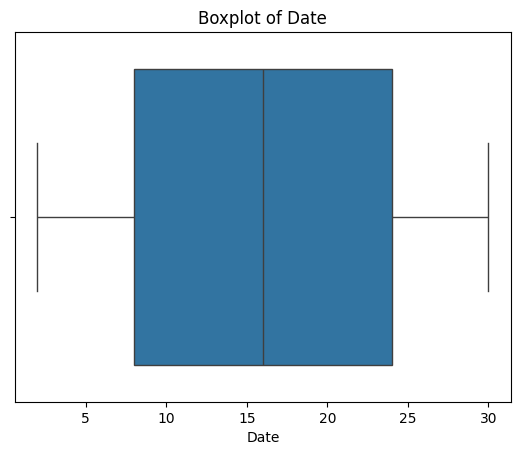

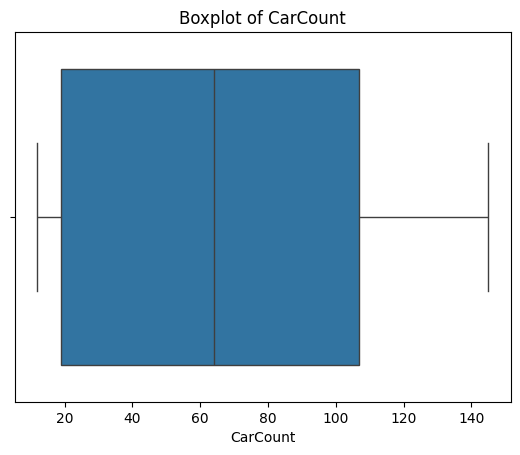

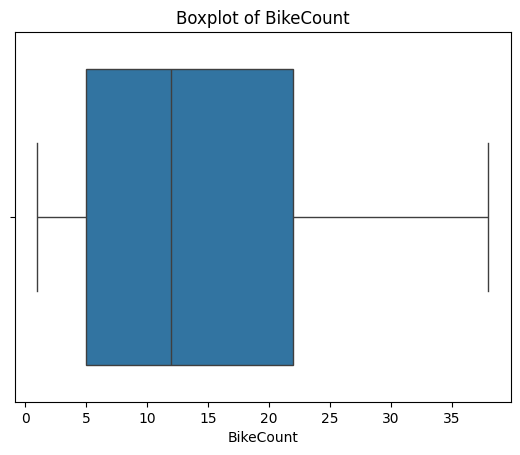

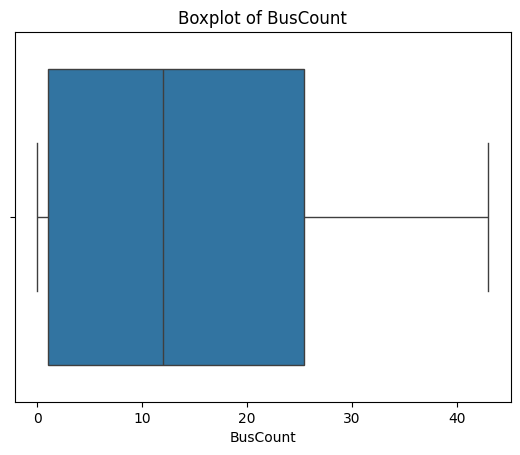

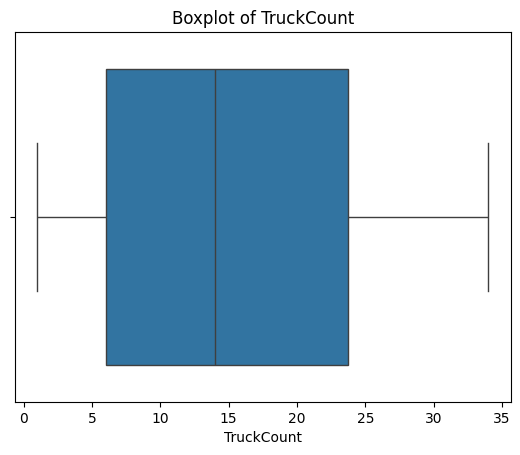

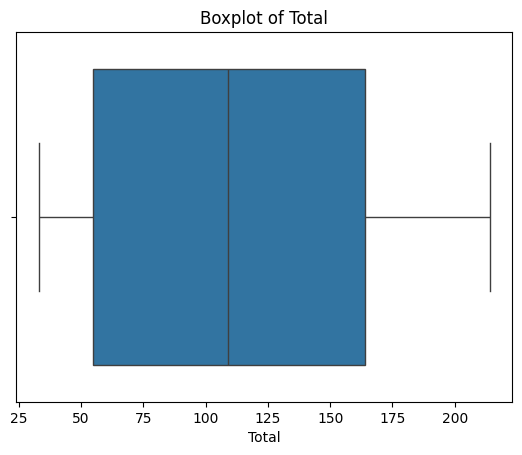

In [ ]:
# Boxplots for numerical columns to detect outliers
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# df['Category'].value_counts().plot(kind='bar')
# plt.title('Category Distribution')
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.show()


In [ ]:
df['Traffic_Situation'] = df['Traffic Situation']


**Predictive Modeling**

Building a predictive model/trained algorithm to get the relation betweeen columns(X) to one col(y)

y = m(x)+c

In [ ]:
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Time Category,Traffic_Situation
0,10.0,tuesday,31.0,1.0,4.0,4.0,39.0,low,Night,low
1,10.0,tuesday,49.0,1.0,3.0,3.0,55.0,low,Night,low
2,10.0,tuesday,46.0,1.0,3.0,6.0,55.0,low,Night,low
3,10.0,tuesday,44.0,1.0,2.0,5.0,58.0,low,Night,low
4,10.0,tuesday,57.0,6.0,15.0,16.0,94.0,normal,Night,normal


In [ ]:
df = df.drop('Traffic Situation',axis=1)

Feature Slection

In [ ]:
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Time Category,Traffic_Situation
0,10.0,tuesday,31.0,1.0,4.0,4.0,39.0,Night,low
1,10.0,tuesday,49.0,1.0,3.0,3.0,55.0,Night,low
2,10.0,tuesday,46.0,1.0,3.0,6.0,55.0,Night,low
3,10.0,tuesday,44.0,1.0,2.0,5.0,58.0,Night,low
4,10.0,tuesday,57.0,6.0,15.0,16.0,94.0,Night,normal


**Selecting X & y:**

Selecting Output column (y) - future prediction column & Input columns (X) - Reference columns

X (independent variables)

y (dependent variable)

In [ ]:
X = df.drop('Traffic_Situation', axis = 1)
y = df['Traffic_Situation']

In [ ]:
X.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Time Category
0,10.0,tuesday,31.0,1.0,4.0,4.0,39.0,Night
1,10.0,tuesday,49.0,1.0,3.0,3.0,55.0,Night
2,10.0,tuesday,46.0,1.0,3.0,6.0,55.0,Night
3,10.0,tuesday,44.0,1.0,2.0,5.0,58.0,Night
4,10.0,tuesday,57.0,6.0,15.0,16.0,94.0,Night


In [ ]:
y.head()

,Traffic_Situation
0,low
1,low
2,low
3,low
4,normal


**Feature Generation**

No Feature Generation required

**Feature Selection :**
All columns are considered as important for y

**Feature Modification :**

Encoding: - Converting Categorical Cols to Numeric

In [ ]:
X.select_dtypes("O")

,Day of the week,Time Category
0,tuesday,Night
1,tuesday,Night
2,tuesday,Night
3,tuesday,Night
4,tuesday,Night
...,...,...
2971,wednesday,Night
2972,thursday,Night
2973,thursday,Night
2974,thursday,Night


From above cols, each column is having more than two classes

So, here apply Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
X['Day of the week'] = label_encoder.fit_transform(X['Day of the week'])

In [ ]:
X['Time Category'] = label_encoder.fit_transform(X['Time Category'])

In [ ]:
X['Time Category'].unique()

array([3, 2, 0, 1])

In [ ]:
df['Traffic_Situation'].unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [ ]:
print(y.head())  # View the first few rows
print(type(y))   # Check whether `y` is a DataFrame or Series


0       low
1       low
2       low
3       low
4    normal
Name: Traffic_Situation, dtype: object
<class 'pandas.core.series.Series'>


For dependent column also applying the Label Encoding

In [ ]:
# # from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OrdinalEncoder

# # # Extract the target column directly from the original DataFrame
# # y = df['Traffic_Situation']  # Ensure column name matches exactly
# # y = label_encoder.fit_transform(y)  # Encode the target variable

# ordinal_encoder = OrdinalEncoder(categories=[['low', 'normal', 'heavy','high']])  # Specify the order if known
# y = ordinal_encoder.fit_transform(y)


# from sklearn.preprocessing import OrdinalEncoder
# import pandas as pd

# # Example DataFrame
# data = {
#     'Traffic_Situation': ['low', 'normal', 'heavy', 'high', 'low', 'high']
# }
# df = pd.DataFrame(data)

# # Extract the target column
# y = df[['Traffic_Situation']]  # Use double brackets to ensure it's a 2D array

# # Apply Ordinal Encoding
# ordinal_encoder = OrdinalEncoder(categories=[['low', 'normal', 'heavy', 'high']])  # Specify category order
# y_encoded = ordinal_encoder.fit_transform(y)

# # Add encoded column to the DataFrame or use it as needed
# df['Traffic_Situation_Encoded'] = y_encoded

# # Display the DataFrame
# print(df)


In [ ]:
print(X.head())

   Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total  \
0  10.0                5      31.0        1.0       4.0         4.0   39.0   
1  10.0                5      49.0        1.0       3.0         3.0   55.0   
2  10.0                5      46.0        1.0       3.0         6.0   55.0   
3  10.0                5      44.0        1.0       2.0         5.0   58.0   
4  10.0                5      57.0        6.0      15.0        16.0   94.0   

   Time Category  
0              3  
1              3  
2              3  
3              3  
4              3  


In [ ]:
y_ = pd.Series(y)
print(y_.head())  # Now you can use head()


0    2
1    2
2    2
3    2
4    3
dtype: int64


In [ ]:
y_.head()

,0
0,2
1,2
2,2
3,2
4,3


In [ ]:
# Scaling : Transforming Numeric Cols data under one scale if there is a scale difference

from sklearn.preprocessing import StandardScaler

# Object Define

sc = StandardScaler()

In [ ]:
X = sc.fit_transform(X)

Train-Test-Split

Dividing Data (X,y) into train and test (Data Validation)


we can go with 80,20 ratio

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((2380, 8), (596, 8))

In [ ]:
feature_names = df.columns[:-1]
X_train = pd.DataFrame(X_train, columns=feature_names)
print(X_train.head(2))

       Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0  1.145616         0.371300 -0.095770   1.150886 -0.724988   -0.998520   
1 -0.110145        -0.122881  1.713756  -0.121686  1.144818   -1.096175   

      Total  Time Category  
0 -0.214995       1.042572  
1  1.448168       0.208514  


In [ ]:
X_train.head(2)

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Time Category
0,1.145616,0.371300,-0.095770,1.150886,-0.724988,-0.998520,-0.214995,1.042572
1,-0.110145,-0.122881,1.713756,-0.121686,1.144818,-1.096175,1.448168,0.208514


In [ ]:
feature_names = df.columns[:-1]
X_test = pd.DataFrame(X_test, columns=feature_names)
print(X_test.head(2))

       Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0 -1.365906        -0.617062 -1.190421   -0.84887 -1.084566   -0.510247   
1 -0.909265         1.359662  0.395706    0.06011 -0.005832    0.759262   

      Total  Time Category  
0 -1.380924       1.042572  
1  0.436553      -0.625543  


In [ ]:
X_test.head(2)

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Time Category
0,-1.365906,-0.617062,-1.190421,-0.84887,-1.084566,-0.510247,-1.380924,1.042572
1,-0.909265,1.359662,0.395706,0.06011,-0.005832,0.759262,0.436553,-0.625543


In [ ]:
y_train.shape, y_test.shape

((2380,), (596,))

**Modelling Procedure**

Model Define

Model Training

Checking Model Param

Evaluation - Metrics, Cross validation

Feature importance

Visualizations

Bias-Variance

Real time prediction

In [ ]:
#importing libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Modeling/Algorithm Training on Train Data

Sending xtrain & ytrain data to a algorithm, where it can study the patterns and gives predictive model to generate y for future x values


Taken y data is categorical, we can apply machine learning supervised classification algorithms


In Classification we have below algorithms


Logistic Regression

Knearest Neighbors (KNN)

Support Vector Machine (SVM)

Naive Bayes (NB)

Decision Trees (CART)

Random Forest (Bagging)

Xgboost (Boosting)

Giving xtrain , ytrain data to all the above models to get better performance model

In [ ]:
# Model Define

log = LogisticRegression()

# ---------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5, p=2)

# Here neighbors are the hyperparameter
# Distance is the another hyperparameter (p) 2 for euclidean distance

# ---------------------------------------------------------
dt = DecisionTreeClassifier() # Taking default Hyper params

# We can try hyp params:
# criteria is the root node selection method
# max_depth is the number of subtrees in decision  tree - main Hyperparameter

# -----------------------------------------------------------
rf = RandomForestClassifier() # Taking Default Hyp params

# We can try hyp params:
# n_estimators are number of decision trees - Hyper parameter

# ------------------------------------------------------------
sv = SVC(kernel = 'rbf', gamma=5) # for a non-linear seperable data

# Gamma=Sigma=coeffient for the rbf kernel - hyperparameter
# Kernel linear-- Linear SVM
#sv = SVC(kernel="linear") # for a linear separable data

# -----------------------------------------------------------
nb = GaussianNB()

# -----------------------------------------------------------
xgb = XGBClassifier() # Taking default Hyper params

**Model Training**

Using xtrain, ytrain data
Using fit command to train the defined model with xtrain, ytrain

**Logistic Regression**

It uses the Linear Regression line to convert it into a sigmoid curve with the logit function output as probability of class

prob = 1/1+e^-y

if prob>0.5 1 else 0

Learning/Training Model on train data:

We can use fit function in model for xtrain and ytrain data to train our data for getting the line co-efficients

In [ ]:
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log.intercept_

array([-5.81600805,  1.78281745, -0.73747395,  4.77066455])

In [ ]:
log.coef_

array([[-0.08262109, -0.01402912,  3.23738402,  0.90730851,  2.39295448,
         2.12414583,  4.28663215,  0.0864891 ],
       [ 0.01668606,  0.04122215, -0.19564914,  0.05861747,  1.75323142,
         2.38817069,  0.36674261,  0.23338703],
       [ 0.07118986,  0.00486519, -1.71918135, -0.71536482, -3.40893838,
        -4.50780313, -2.87130355, -0.39359979],
       [-0.00525482, -0.03205822, -1.32255354, -0.25056116, -0.73724752,
        -0.00451339, -1.78207121,  0.07372365]])

**KNN** - K Nearest Neighbors
It will take the nearest data points using euclidean distance metric with number of k given

It is a lazy algorithm , it wont train the data instead it will store the data

It will do the training when test data given

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Decision Tree :**
Logic Tree based predictions based on root and interior nodes, branches

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Feature Importance**

In [ ]:
pd.DataFrame(index = dt.feature_names_in_,data = [round(val,2) for val in dt.feature_importances_], columns = ['FeatureImportance'])

,FeatureImportance
Date,0.00
Day of the week,0.00
CarCount,0.00
BikeCount,0.00
BusCount,0.18
TruckCount,0.18
Total,0.63
Time Category,0.00


In [ ]:
from sklearn.tree import plot_tree

**Random Forest :**
Bagging algorithm which was a combination of Multiple Decision Trees

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pd.DataFrame(index = rf.feature_names_in_,data = [round(val,2) for val in rf.feature_importances_], columns = ['FeatureImportance'])

# Assuming 'X_train' is your training data and is a pandas DataFrame
# feature_importance = pd.DataFrame({
#     'Feature': X_train.columns,  # Use columns from your training DataFrame
#     'Importance': rf.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print(feature_importance)


,FeatureImportance
Date,0.01
Day of the week,0.02
CarCount,0.19
BikeCount,0.07
BusCount,0.15
TruckCount,0.23
Total,0.30
Time Category,0.03


Trees

In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1458060581),
 DecisionTreeClassifier(max_features='sqrt', random_state=83265898),
 DecisionTreeClassifier(max_features='sqrt', random_state=620481080),
 DecisionTreeClassifier(max_features='sqrt', random_state=521186799),
 DecisionTreeClassifier(max_features='sqrt', random_state=829081802),
 DecisionTreeClassifier(max_features='sqrt', random_state=1042223621),
 DecisionTreeClassifier(max_features='sqrt', random_state=1776975881),
 DecisionTreeClassifier(max_features='sqrt', random_state=1991475286),
 DecisionTreeClassifier(max_features='sqrt', random_state=462405961),
 DecisionTreeClassifier(max_features='sqrt', random_state=108400986),
 DecisionTreeClassifier(max_features='sqrt', random_state=838755851),
 DecisionTreeClassifier(max_features='sqrt', random_state=284033242),
 DecisionTreeClassifier(max_features='sqrt', random_state=614529771),
 DecisionTreeClassifier(max_features='sqrt', random_state=647511527),
 DecisionTreeClas

**SVM :**
Support vectors (Data Points grouped with Soft Margin Classifier) - for linear data

for non-linear data kernel trick is used to divide classes - rbf , poly

In [ ]:
sv.fit(X_train, y_train)

SVC(gamma=5)

In [ ]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 5,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Naive Bayes :**
Naive Bayes works on Bayesian Probability formula

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

**XGB :**
Boosting Algorithm where for the selected number of models , one model error will be trained by another model

In [ ]:
# xgboost accepts label data as number

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ytrain_xg = le.fit_transform(y_train)

In [ ]:
ytrain_xg

array([2, 0, 0, ..., 0, 3, 3])

In [ ]:
xgb.fit(X_train,ytrain_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Model Evaluation/Performance

In [ ]:
# Modules for Metrics

from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

*Checking the above models perfomance using Test data*

In [ ]:
names = ['LogisticRegression', 'KNearestNeighbors', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'Xgboost']

models = [log, knn, nb, sv, dt, rf, xgb]

In [ ]:
!pip install simple-colors


Model: LogisticRegression

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       127
           1       0.87      0.71      0.78        63
           2       0.85      0.76      0.80        66
           3       0.92      0.93      0.92       340

    accuracy                           0.90       596
   macro avg       0.88      0.85      0.86       596
weighted avg       0.90      0.90      0.90       596

Confusion_Matrix:


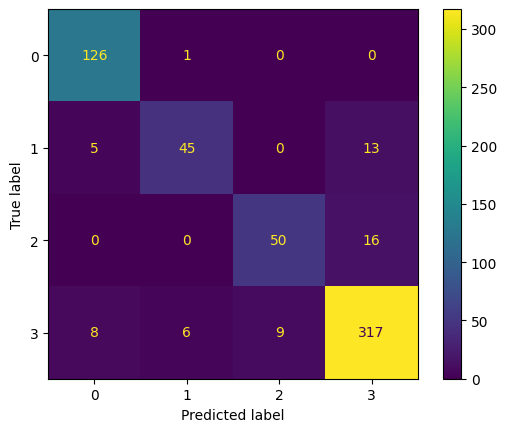

-----------------------------------------------------------------------------------
Model: KNearestNeighbors

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       127
           1       0.81      0.68      0.74        63
           2       0.82      0.76      0.79        66
           3       0.91      0.91      0.91       340

    accuracy                           0.88       596
   macro avg       0.85      0.83      0.83       596
weighted avg       0.88      0.88      0.88       596

Confusion_Matrix:


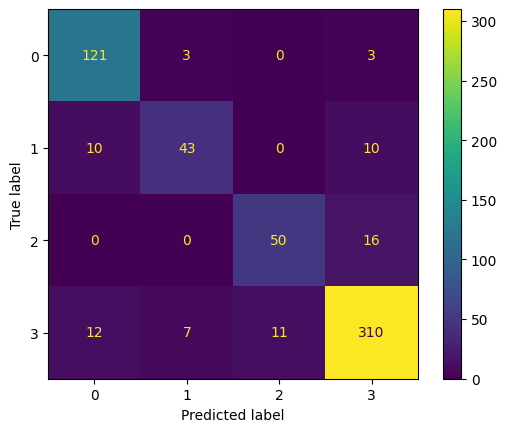

-----------------------------------------------------------------------------------
Model: Naive Bayes

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       127
           1       0.42      0.70      0.52        63
           2       0.91      0.80      0.85        66
           3       0.92      0.78      0.84       340

    accuracy                           0.81       596
   macro avg       0.77      0.81      0.78       596
weighted avg       0.85      0.81      0.82       596

Confusion_Matrix:


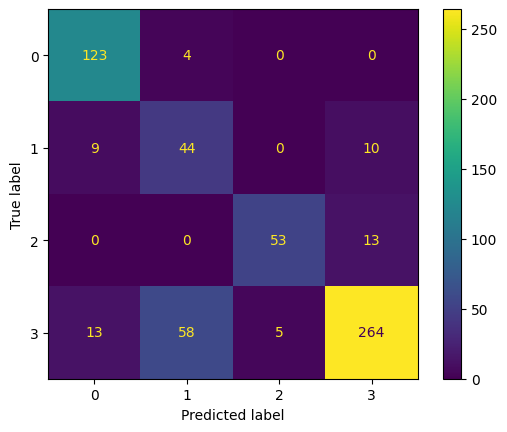

-----------------------------------------------------------------------------------
Model: SVM

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.47      0.63       127
           1       1.00      0.03      0.06        63
           2       0.95      0.29      0.44        66
           3       0.66      0.99      0.79       340

    accuracy                           0.70       596
   macro avg       0.89      0.45      0.48       596
weighted avg       0.79      0.70      0.64       596

Confusion_Matrix:


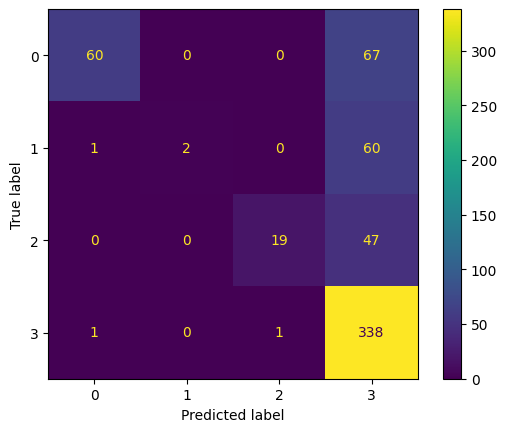

-----------------------------------------------------------------------------------
Model: Decision Tree

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       127
           1       0.98      1.00      0.99        63
           2       1.00      1.00      1.00        66
           3       1.00      0.99      0.99       340

    accuracy                           0.99       596
   macro avg       0.99      1.00      0.99       596
weighted avg       0.99      0.99      0.99       596

Confusion_Matrix:


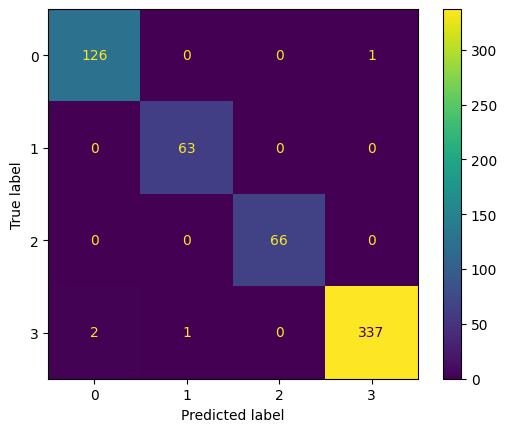

-----------------------------------------------------------------------------------
Model: Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       0.95      0.97      0.96        63
           2       1.00      0.98      0.99        66
           3       0.99      0.99      0.99       340

    accuracy                           0.99       596
   macro avg       0.98      0.98      0.98       596
weighted avg       0.99      0.99      0.99       596

Confusion_Matrix:


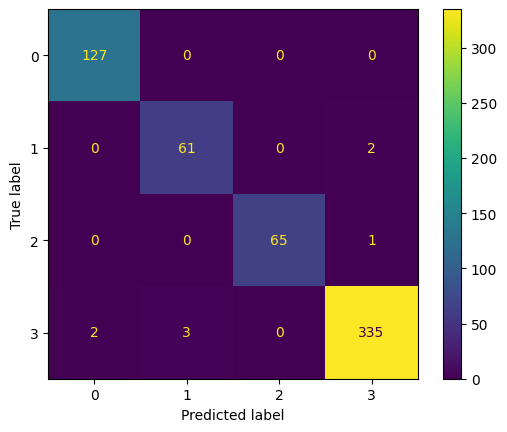

-----------------------------------------------------------------------------------
Model: Xgboost

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       127
           1       0.95      1.00      0.98        63
           2       1.00      1.00      1.00        66
           3       1.00      0.99      0.99       340

    accuracy                           0.99       596
   macro avg       0.98      0.99      0.99       596
weighted avg       0.99      0.99      0.99       596

Confusion_Matrix:


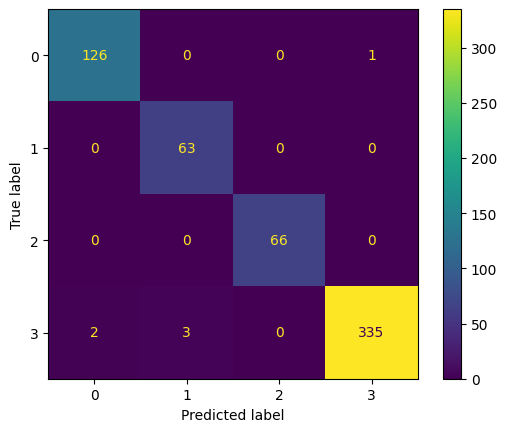

-----------------------------------------------------------------------------------


In [ ]:
from simple_colors import *

for i in range(len(models)):
    print(green("Model: {}\n".format(names[i]),['bold']))
    if models[i] == xgb:
        ytest_pred = models[i].predict(X_test)
        ytest_xg = le.transform(y_test)
        print("Classification Report:\n",classification_report(ytest_xg, ytest_pred))
        print(blue("Confusion_Matrix:",['bold']))
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], X_test, ytest_xg))
        print("-----------------------------------------------------------------------------------")
    else:
        ytest_pred = models[i].predict(X_test)
        print("Classification Report:\n",classification_report(y_test, ytest_pred))
        print(blue("Confusion_Matrix:",['bold']))
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], X_test, y_test))
        print("-----------------------------------------------------------------------------------")

In [ ]:
trainscore = []
testscore = []
fit = []
crossvalscore = []

In [ ]:
for i in range(len(models)):

    if models[i] == xgb:

        ytrain_xg = le.transform(y_train)
        ytest_xg = le.transform(y_test)

        ytrain_pred = models[i].predict(X_train)
        ytest_pred = models[i].predict(X_test)

        # f1 Score
        f1_score_tr = round(f1_score(ytrain_xg, ytrain_pred, average='micro'),2)
        f1_score_te = round(f1_score(ytest_xg, ytest_pred, average='micro'),2)

        trainscore.append(f1_score_tr)
        testscore.append(f1_score_te)

        # Bias-Variance Trade off
        trscore = f1_score_tr
        tescore = f1_score_te

        if trscore<0.50 and tescore<0.50:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")

        else:
            if abs(trscore-tescore)<0.10:
                fit.append("Goodfit")
            elif abs(trscore-tescore)>=0.10:
                fit.append("Overfit")
            else:
                fit.append("Fit")

        y_xg = le.transform(y)

        # Cross-val score
        scores = cross_val_score(models[i], X, y_xg, cv=3, scoring='f1_micro')
        crossvalscore.append(round(scores.mean(),2))

    else:

        ytrain_pred = models[i].predict(X_train)
        ytest_pred = models[i].predict(X_test)

        # f1 Score
        f1_score_tr = round(f1_score(y_train, ytrain_pred, average='micro'),2)
        f1_score_te = round(f1_score(y_test, ytest_pred, average='micro'),2)

        trainscore.append(f1_score_tr)
        testscore.append(f1_score_te)

        # Bias-Variance Trade off
        trscore = f1_score_tr
        tescore = f1_score_te

        if trscore<0.50 and tescore<0.50:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")

        else:
            if abs(trscore-tescore)<0.10:
                fit.append("Goodfit")
            elif abs(trscore-tescore)>=0.10:
                fit.append("Overfit")
            else:
                fit.append("Fit")


        # Cross-val score
        scores = cross_val_score(models[i], X, y, cv=3, scoring='f1_micro')
        crossvalscore.append(round(scores.mean(),2))

In [ ]:
pd.DataFrame({
    'Model': names,
    'Trainedmodel': models,
    'Trainscore': trainscore,
    'Testscore': testscore,
    'Crossvalscore': crossvalscore,
    'Fit': fit
})

,Model,Trainedmodel,Trainscore,Testscore,Crossvalscore,Fit
0,LogisticRegression,LogisticRegression(),0.90,0.90,0.89,Goodfit
1,KNearestNeighbors,KNeighborsClassifier(),0.93,0.88,0.84,Goodfit
2,Naive Bayes,GaussianNB(),0.82,0.81,0.82,Goodfit
3,SVM,SVC(gamma=5),0.99,0.70,0.58,Overfit
4,Decision Tree,DecisionTreeClassifier(),1.00,0.99,0.99,Goodfit
5,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,0.99,0.99,Goodfit
6,Xgboost,"XGBClassifier(base_score=None, booster=None, c...",1.00,0.99,0.99,Goodfit


Using best model (Xgboost) to get probability & prediction of Genre , given data by user

In [ ]:
# def Music_Genre_Prediction():

#     print("Reference Data for Input:")
#     display(inpdata.head())
#     print("Xgboost built on the below X columns:")
#     print()
#     print(inpdata.columns)
#     print("======================= Enter User Input Data ====================")
#     print()
#     vals = []
#     for col in inpdata.columns:
#         print(f"Enter {col} Value in Range {(inpdata[col].min(), inpdata[col].max())}:")
#         val = eval(input())
#         vals.append(val)
#         print()

#     row = pd.DataFrame([vals], columns = inpdata.columns)

#     print("Given User Input Data:")
#     display(row)
#     print()

#     ####### Data Pre-Processing #######

#     row.iloc[:,:] = sc.fit_transform(row.iloc[:,:])

#     print("********** Prediction ***********")
#     print()
#     probs = {}
#     for i in range(len(le.classes_)):
#         probs[le.classes_[i]] = round(float(xgb.predict_proba(row)[0][i]),2)

#     print("Genre Probabilities:")
#     print(probs)
#     print()
#     out = xgb.predict(row)[0]

#     print("Genre Prediction:", le.inverse_transform([[out]])[0])
# Music_Genre_Prediction()

Saving Model for Further use (Model Deployment Purpose)
we can save the trained sklearn models which has given better results. which further can be used anywhere to get predictions

Joblib module helps us to save the model

any ml model can be saved in .pkl format

Note:

sklearn fit_transform and fit objects will be saved

In [ ]:
import joblib

# Saving onehot encoded model

# joblib.dump(ohe, 'ohe.pkl')

# Saving scaling model

joblib.dump(sc, 'sc.pkl')

# Saving trained model

joblib.dump(xgb, 'xgb.pkl')

['xgb.pkl']

In [ ]:
import joblib

# ohe = joblib.load("ohe.pkl")

sc = joblib.load("sc.pkl")

xgb = joblib.load('xgb.pkl')

In [ ]:
#KNN,SVM,DT,RF,XGB,POLY,LASSO,RIDGE

In [ ]:
# pd.DataFrame({
#     'Model': names,
#     'Trainedmodel': models,
#     'Trainscore': trainscore,
#     'Testscore': testscore,
#     'Crossvalscore': crossvalscore,
#     'Fit': fit
# })

In [ ]:
# imblanced data - AUC-ROC, mostly F1-score

#target column ordinal encoding
#week days- nominal encoding
#time - ordinal/nomial


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       127
           1       0.95      1.00      0.98        63
           2       1.00      1.00      1.00        66
           3       1.00      0.99      0.99       340

    accuracy                           0.99       596
   macro avg       0.98      0.99      0.99       596
weighted avg       0.99      0.99      0.99       596

Weighted F1 Score: 0.9899715009976199


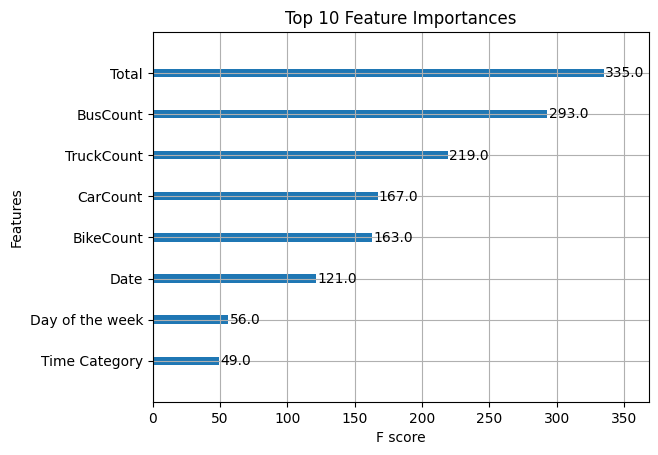

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# Define XGBoost model (scale_pos_weight is not applicable for multi-class directly)
model1 = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    eval_metric='mlogloss',    # Evaluation metric
    random_state=42,
    num_class=4                 # Adjust according to your dataset's number of classes
)

# Train the model
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)

# Evaluate the model with Classification Report and F1 Score
print("Classification Report:\n", classification_report(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1 Score:", f1)

# Plot Feature Importance
xgb.plot_importance(model1, importance_type='weight', max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


In [ ]:
pd.DataFrame({
    'Model': names,
    'Trainedmodel': models,
    'Trainscore': trainscore,
    'Testscore': testscore,
    'Crossvalscore': crossvalscore,
    'Fit': fit
})

,Model,Trainedmodel,Trainscore,Testscore,Crossvalscore,Fit
0,LogisticRegression,LogisticRegression(),0.90,0.90,0.89,Goodfit
1,KNearestNeighbors,KNeighborsClassifier(),0.93,0.88,0.84,Goodfit
2,Naive Bayes,GaussianNB(),0.82,0.81,0.82,Goodfit
3,SVM,SVC(gamma=5),0.99,0.70,0.58,Overfit
4,Decision Tree,DecisionTreeClassifier(),1.00,0.99,0.99,Goodfit
5,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,0.99,0.99,Goodfit
6,Xgboost,"XGBClassifier(base_score=None, booster=None, c...",1.00,0.99,0.99,Goodfit


In [ ]:
# for i in range(len(models)):

#     if models[i] == xgb:

#         ytrain_xg = le.transform(y_train)
#         ytest_xg = le.transform(y_test)

#         ytrain_pred = models[i].predict(X_train)
#         ytest_pred = models[i].predict(X_test)

#         # f1 Score
#         f1_score_tr = round(f1_score(ytrain_xg, ytrain_pred, average='micro'),2)
#         f1_score_te = round(f1_score(ytest_xg, ytest_pred, average='micro'),2)

#         trainscore.append(f1_score_tr)
#         testscore.append(f1_score_te)

#         # Bias-Variance Trade off
#         trscore = f1_score_tr
#         tescore = f1_score_te

#         if trscore<0.50 and tescore<0.50:
#             if abs(trscore)==0 and abs(tescore)==0:
#                 fit.append("Nofit")
#             else:
#                 fit.append("Underfit")

#         else:
#             if abs(trscore-tescore)<0.10:
#                 fit.append("Goodfit")
#             elif abs(trscore-tescore)>=0.10:
#                 fit.append("Overfit")
#             else:
#                 fit.append("Fit")

#         y_xg = le.transform(y)

#         # Cross-val score
#         scores = cross_val_score(models[i], X, y_xg, cv=3, scoring='f1_micro')
#         crossvalscore.append(round(scores.mean(),2))

#     else:

#         ytrain_pred = models[i].predict(X_train)
#         ytest_pred = models[i].predict(X_test)

#         # f1 Score
#         f1_score_tr = round(f1_score(y_train, ytrain_pred, average='micro'),2)
#         f1_score_te = round(f1_score(y_test, ytest_pred, average='micro'),2)

#         trainscore.append(f1_score_tr)
#         testscore.append(f1_score_te)

#         # Bias-Variance Trade off
#         trscore = f1_score_tr
#         tescore = f1_score_te

#         if trscore<0.50 and tescore<0.50:
#             if abs(trscore)==0 and abs(tescore)==0:
#                 fit.append("Nofit")
#             else:
#                 fit.append("Underfit")

#         else:
#             if abs(trscore-tescore)<0.10:
#                 fit.append("Goodfit")
#             elif abs(trscore-tescore)>=0.10:
#                 fit.append("Overfit")
#             else:
#                 fit.append("Fit")


#         # Cross-val score
#         scores = cross_val_score(models[i], X, y, cv=3, scoring='f1_micro')
#         crossvalscore.append(round(scores.mean(),2))